# <span style="color: blue;"> PART 1 :Importing Libraries and datasets </span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler


In [2]:
# Following code was used to identify the type of encoding of file
# import chardet

# # Detect encoding from a file
# with open('Open_Invoice_data.csv', 'rb') as f:
#     result = chardet.detect(f.read())
#     encoding = result['encoding']

# print(encoding)


In [3]:
df_Past_Payments = pd.read_csv('Received_Payments_Data.csv')

In [4]:
Data_Dict = pd.read_excel('Data+Dictionary.xlsx',header = None)

In [5]:
# let's have look at column description :
for i in range(16):
    print(Data_Dict[0][i],':',Data_Dict[1][i])

RECEIPT_METHOD : In which method payments have been made
CUSTOMER_NAME : Name of the customer/vendor
CUSTOMER_NUMBER : Customer's unique identity number
RECEIPT_DOC_NO : Reference number of the payment receipt
RECEIPT_DATE : The date in which the payment has been made
CLASS : As the payment against these invoices have already been received so Transaction Class as PMT (short for Payment) assigned
CURRENCY_CODE : Currency used for the payment
Local Amount : Invoice value in local currency
USD Amount : Invoice Value converted to USD
INVOICE_ALLOCATED : Invoice number that has been allocated to a particular vendor
INVOICE_CREATION_DATE : The date on which the invoice was created
DUE_DATE : The date by which the payment was to be made
PAYMENT_TERM : Days given to the vendor/customer for making the payments
INVOICE_CLASS : Three types of Invoice classes - Credit Memo or Credit Note (CM), Debit Memo or Debit Note (DM) or Invoice (INV)
INVOICE_CURRENCY_CODE : Currency code as per the invoice g

-----------------

## <span style="color: blue;">PART 2 : Preliminary analysis of Past payments</span>

In [6]:
df_Past_Payments.shape

(93937, 16)

In [7]:
df_Past_Payments.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [8]:
df_Past_Payments.isnull().sum()

RECEIPT_METHOD            0
CUSTOMER_NAME             0
CUSTOMER_NUMBER           0
RECEIPT_DOC_NO           29
RECEIPT_DATE              0
CLASS                     0
CURRENCY_CODE             0
Local Amount              0
USD Amount                0
INVOICE_ALLOCATED         0
INVOICE_CREATION_DATE     0
DUE_DATE                  0
PAYMENT_TERM              0
INVOICE_CLASS             0
INVOICE_CURRENCY_CODE     0
INVOICE_TYPE              0
dtype: int64

In [9]:
df_Past_Payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

## <span style="color: blue;"> Treatment of columns related to date </span>

In [10]:
df_Past_Payments['DUE_DATE'] = pd.to_datetime(df_Past_Payments['DUE_DATE'])
df_Past_Payments['RECEIPT_DATE'] = pd.to_datetime(df_Past_Payments['RECEIPT_DATE'])
df_Past_Payments['INVOICE_CREATION_DATE'] = pd.to_datetime(df_Past_Payments['INVOICE_CREATION_DATE'])


### Creating New column of Payment term days from due date and Invoice creation data data as existing column is in textual format.
Target vaiable
- True :  Late payment
- False : On time payment  


In [11]:
df_Past_Payments['late_days'] = (df_Past_Payments['RECEIPT_DATE'] - df_Past_Payments['DUE_DATE']).apply(lambda x:x.days)
df_Past_Payments['payment_term_days'] = df_Past_Payments['DUE_DATE'] - df_Past_Payments['INVOICE_CREATION_DATE']
df_Past_Payments['TARGET_VARIABLE'] = df_Past_Payments['late_days'] > 0
df_Past_Payments['payment_term_days'] = df_Past_Payments['payment_term_days'].apply(lambda x:x.days)

In [12]:
# Let's check whether the USD amount is less than zero If it is negative, we can remove it
df_Past_Payments['USD Amount'].min()

0.0

there is nothing to remove here ,let's check invoice classification 


In [13]:
df_Past_Payments['INVOICE_CLASS'].value_counts()

INV    88124
CM      5261
DM       552
Name: INVOICE_CLASS, dtype: int64


A credit memo, short for "credit memorandum" or "credit note," is a financial document used in business transactions to indicate that a seller owes a customer a refund or credit for a previously billed amount.

So we can remove these entries which are realted with Invoice class 'CM' as the payment was from our side

In [14]:
df_Past_Payments = df_Past_Payments[df_Past_Payments['INVOICE_CLASS'] != 'CM']

In [15]:
df_Past_Payments.payment_term_days.min()

-3622

In [16]:
df_Past_Payments[df_Past_Payments.payment_term_days <0]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,late_days,payment_term_days,TARGET_VARIABLE
148,WIRE,RADW Corp,34647,1.000000e+11,2021-04-14,PMT,USD,2345.81,2345.810000,1.0021E+11,2021-04-01,2021-03-31,100% Adv Payment,INV,AED,Non Goods,14,-1,True
152,WIRE,RADW Corp,34647,1.000000e+11,2021-04-14,PMT,USD,2345.81,2345.810000,1.0021E+11,2021-04-01,2021-03-31,100% Adv Payment,INV,AED,Non Goods,14,-1,True
160,WIRE,REAL Corp,4002,1.000000e+11,2021-04-20,PMT,AED,98247.31,98247.310000,PAY1001522100494,2021-03-31,2021-03-01,Immediate Payment,INV,AED,Non Goods,50,-30,True
167,WIRE,RADW Corp,34647,1.000000e+11,2021-04-24,PMT,AED,10861.54,10861.540000,1.0021E+11,2021-04-01,2021-03-31,100% Adv Payment,INV,AED,Non Goods,24,-1,True
168,WIRE,RADW Corp,34647,1.000000e+11,2021-04-24,PMT,AED,10861.54,10861.540000,1.0021E+11,2021-04-01,2021-03-31,100% Adv Payment,INV,AED,Non Goods,24,-1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93880,WIRE,SAUD Corp,38035,2.910000e+11,2021-05-31,PMT,SAR,0.00,0.000000,2000006467,2020-06-28,2017-08-31,30 Days from Inv Date,INV,SAR,Non Goods,1369,-1032,True
93881,WIRE,SAUD Corp,38035,2.910000e+11,2021-05-31,PMT,SAR,0.00,0.000000,2000006765,2020-06-28,2017-09-06,30 Days from Inv Date,INV,SAR,Non Goods,1363,-1026,True
93882,WIRE,SAUD Corp,38035,2.910000e+11,2021-05-31,PMT,SAR,0.00,0.000000,2000006917,2020-06-28,2017-09-09,30 Days from Inv Date,INV,SAR,Non Goods,1360,-1023,True
93883,WIRE,SAUD Corp,38035,2.910000e+11,2021-05-31,PMT,SAR,0.00,0.000000,2000007075,2020-06-28,2017-09-13,30 Days from Inv Date,INV,SAR,Non Goods,1356,-1019,True


in 2761 cases, the payment was done before the invoice was generated
for these cases, let's drop these entries

In [17]:
df_Past_Payments=df_Past_Payments[df_Past_Payments.payment_term_days >=0]

In [18]:
df_Past_Payments.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,late_days,payment_term_days,TARGET_VARIABLE
0,WIRE,C EA Corp,37403,1.421000e+10,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,111,58,True
1,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,3,30,True
2,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,-29,30,False
3,WIRE,FARO Corp,1409,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,17,30,True
4,WIRE,RADW Corp,4003,9.921000e+10,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,17,30,True


In [19]:
df_Past_Payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85915 entries, 0 to 93936
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         85915 non-null  object        
 1   CUSTOMER_NAME          85915 non-null  object        
 2   CUSTOMER_NUMBER        85915 non-null  int64         
 3   RECEIPT_DOC_NO         85899 non-null  float64       
 4   RECEIPT_DATE           85915 non-null  datetime64[ns]
 5   CLASS                  85915 non-null  object        
 6   CURRENCY_CODE          85915 non-null  object        
 7   Local Amount           85915 non-null  float64       
 8   USD Amount             85915 non-null  float64       
 9   INVOICE_ALLOCATED      85915 non-null  object        
 10  INVOICE_CREATION_DATE  85915 non-null  datetime64[ns]
 11  DUE_DATE               85915 non-null  datetime64[ns]
 12  PAYMENT_TERM           85915 non-null  object        
 13  I


--------------------------

## <span style="color: violet ;">PART 3 :now the data looks fairly good, let's perform EDA analysis </span> 


In [20]:
cat_columns = ['RECEIPT_METHOD', 'CLASS', 'CURRENCY_CODE', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE']
num_columns = ['Local Amount','USD Amount','late_days','payment_term_days']

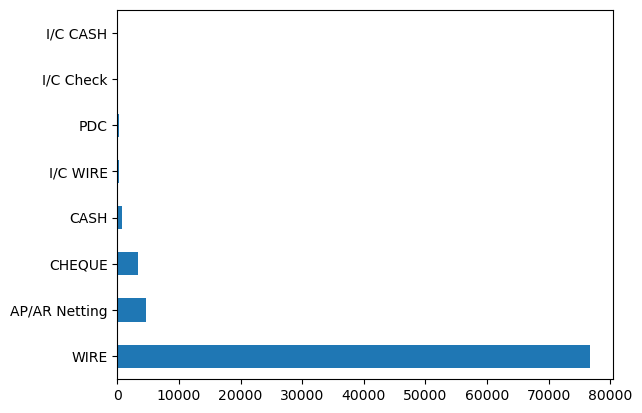

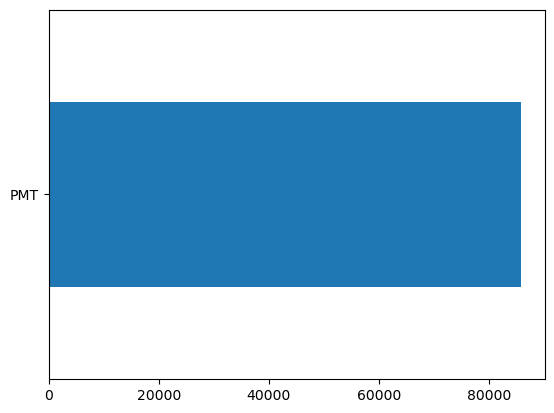

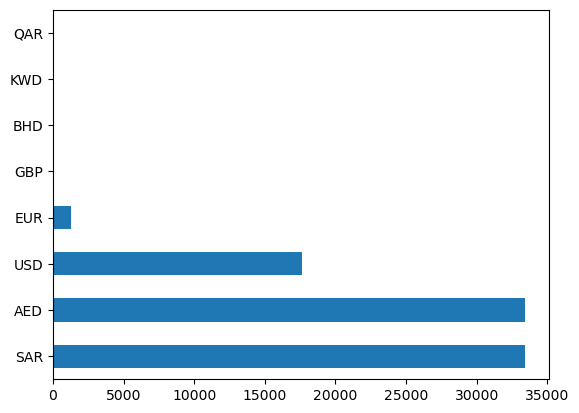

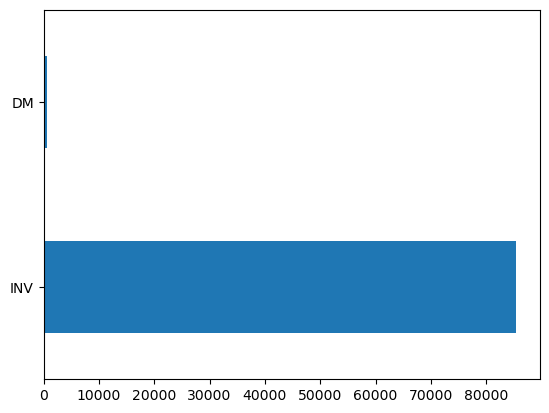

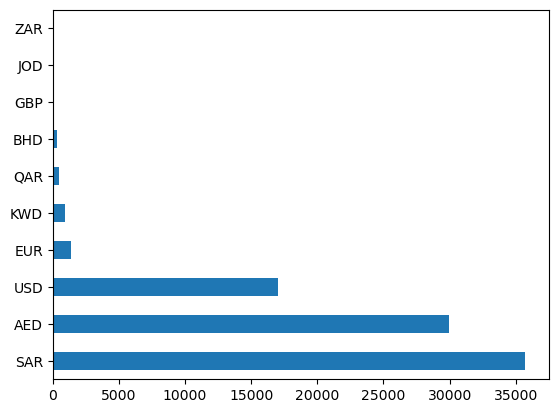

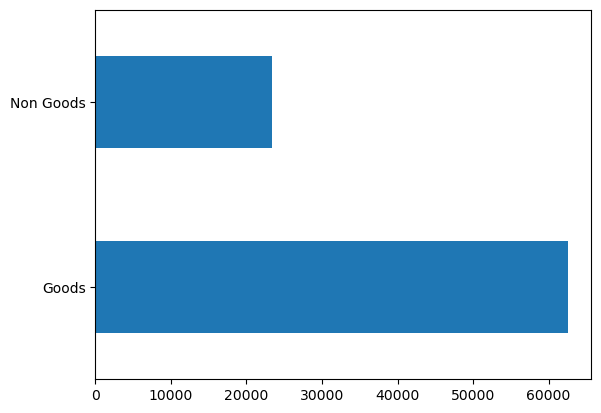

In [21]:
for i in cat_columns:
    df_Past_Payments[i].value_counts().plot.barh()
    plt.show()

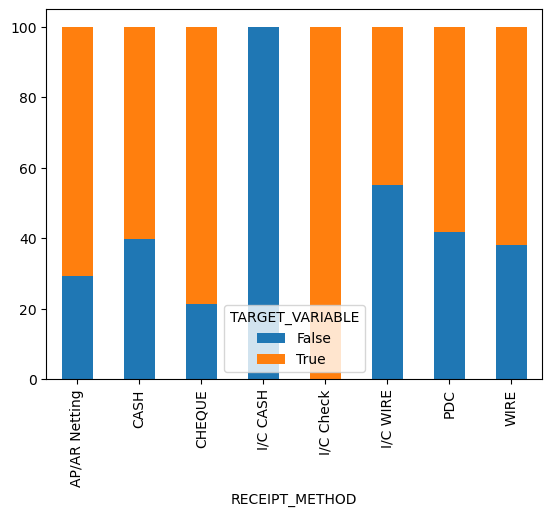

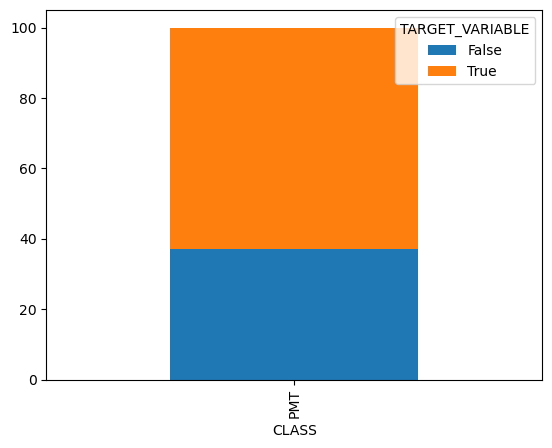

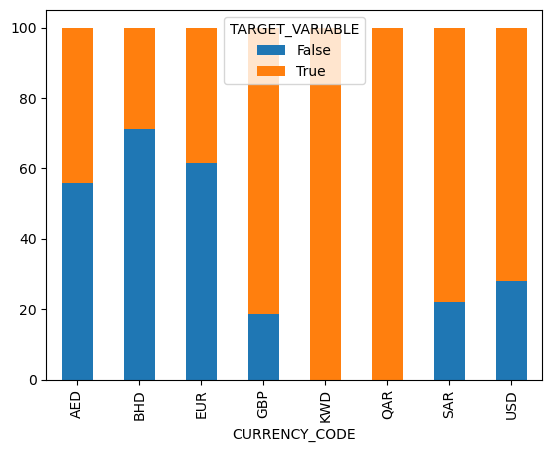

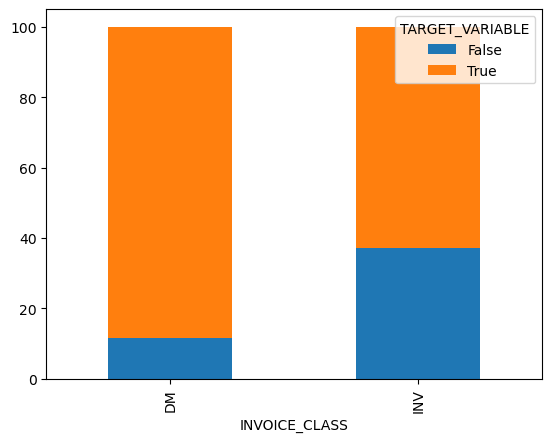

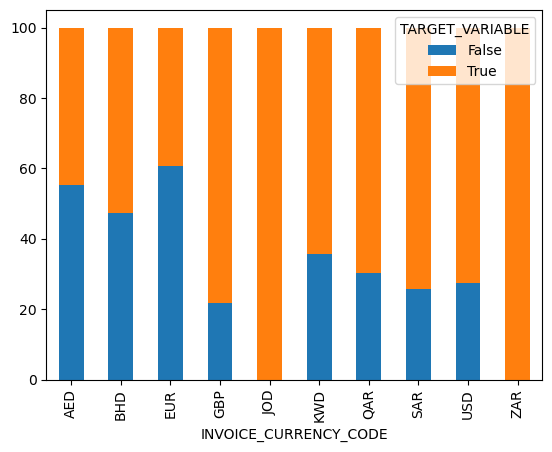

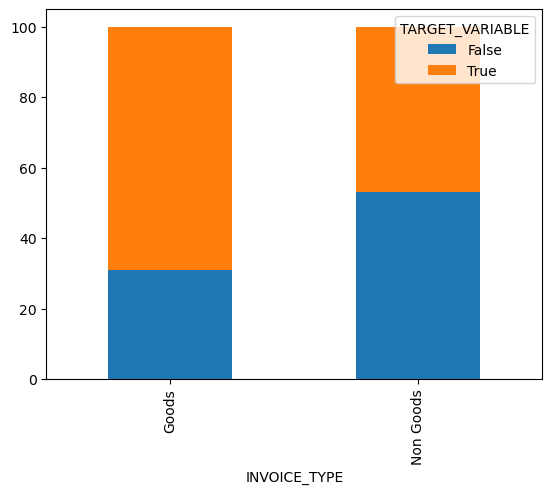

In [22]:
for i in cat_columns:
    pivot_df = df_Past_Payments.pivot_table(index= i , columns='TARGET_VARIABLE', aggfunc='size', fill_value=0)
    pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

    pivot_df_percent.plot(kind='bar', stacked=True)
    plt.show()

## Less common currencies seems to be associated with higher late payment rates

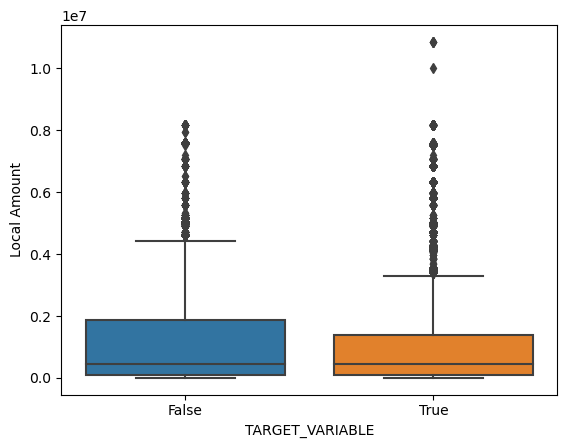

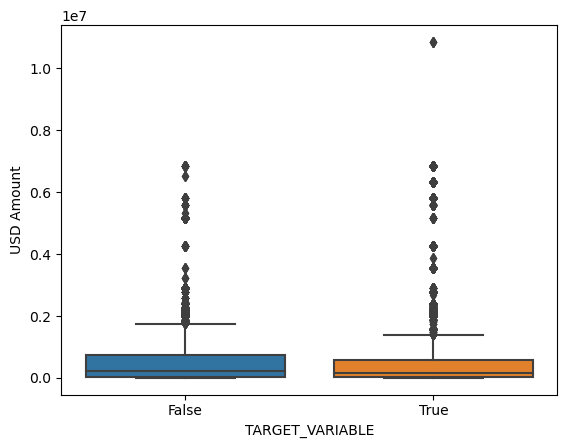

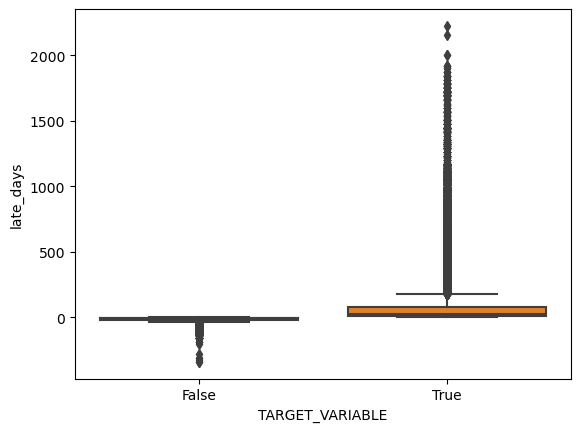

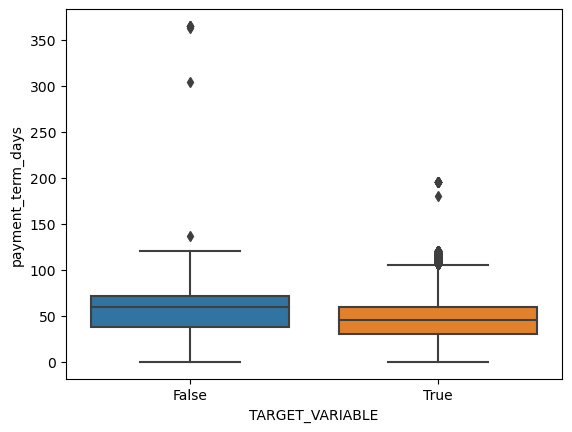

In [23]:
for i in num_columns:
    sns.boxplot(data=df_Past_Payments,y= i , x="TARGET_VARIABLE")
    plt.show()


Let's remove the outliers and observe numerical dataset again 


In [24]:
for i in num_columns:
    df_Past_Payments = df_Past_Payments[df_Past_Payments[i] <= np.percentile(df_Past_Payments[i], 99)]

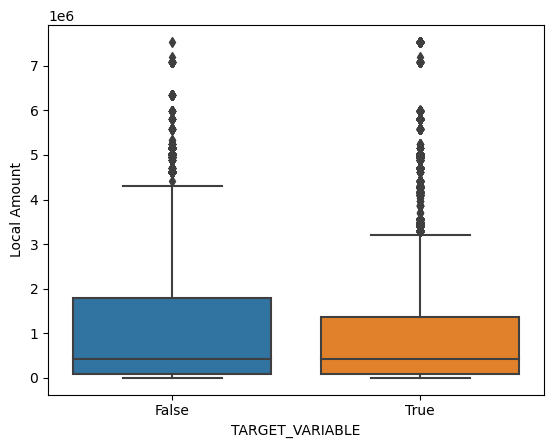

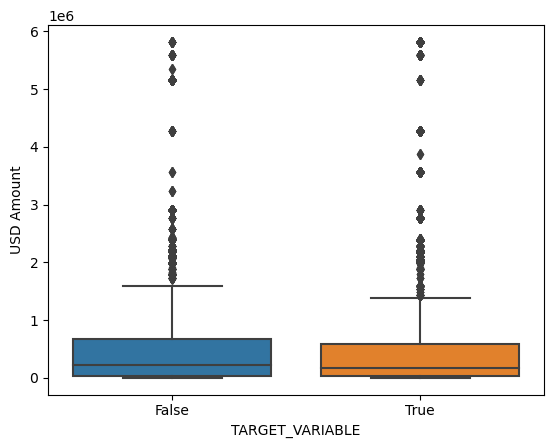

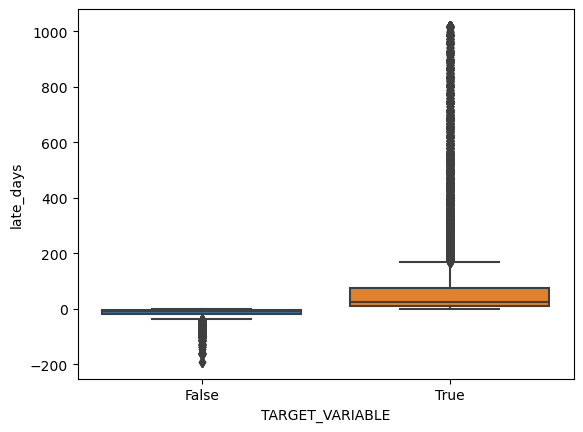

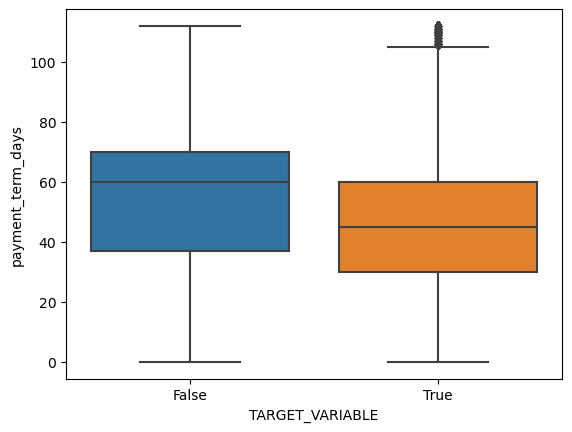

In [25]:
for i in num_columns:
    sns.boxplot(data=df_Past_Payments,y= i , x="TARGET_VARIABLE")
    plt.show()


there was no such pattern observed in the Numerical categories.

------------------

# <span style="color: green;"> PART 4: Let's segment customers acoording to the behavior 
</span>

We will segment our customers based on two derived variables: 
- the average payment time in days for a customer
- the standard deviation for the payment time. 

In [26]:
data_for_clustering = df_Past_Payments[['CUSTOMER_NUMBER', 'late_days','payment_term_days','TARGET_VARIABLE']]

In [27]:
data_for_clustering['Avg_late_payment_time'] = data_for_clustering.groupby('CUSTOMER_NUMBER')['late_days'].transform('mean')
data_for_clustering['std_late_payment_time'] = data_for_clustering.groupby('CUSTOMER_NUMBER')['late_days'].transform('std')


C:\Users\naikh\AppData\Local\Temp\ipykernel_16124\2066604202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['Avg_late_payment_time'] = data_for_clustering.groupby('CUSTOMER_NUMBER')['late_days'].transform('mean')
C:\Users\naikh\AppData\Local\Temp\ipykernel_16124\2066604202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['std_late_payment_time'] = data_for_clustering.groupby('CUSTOMER_NUMBER')['late_days'].transform('std')


In [28]:
data_for_clustering

,CUSTOMER_NUMBER,late_days,payment_term_days,TARGET_VARIABLE,Avg_late_payment_time,std_late_payment_time
0,37403,111,58,True,52.000000,61.098281
1,4003,3,30,True,5.837174,23.786510
2,4003,-29,30,False,5.837174,23.786510
3,1409,17,30,True,100.176536,247.281135
4,4003,17,30,True,5.837174,23.786510
...,...,...,...,...,...,...
93928,21144,-4,57,False,1.933333,19.001754
93929,21144,20,60,True,1.933333,19.001754
93931,21144,47,54,True,1.933333,19.001754
93935,21145,8,59,True,16.939189,27.917085


In [29]:
data_for_clustering2 = data_for_clustering[['CUSTOMER_NUMBER', 'Avg_late_payment_time','std_late_payment_time']]

In [30]:
data_for_clustering3 = data_for_clustering2.drop_duplicates()

In [31]:
data_for_clustering3.isnull().sum()

CUSTOMER_NUMBER            0
Avg_late_payment_time      0
std_late_payment_time    162
dtype: int64

Grouping by standard deviation have resulted in NaN values for certain rows when there's only one entry related to that customer.removing these rows

In [32]:
data_for_clustering3 = data_for_clustering3.dropna()

c:\Users\naikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg_late_payment_time'>

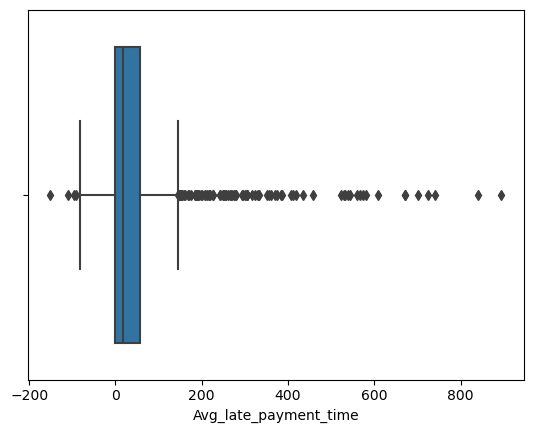

In [33]:
sns.boxplot(data_for_clustering3.Avg_late_payment_time)

c:\Users\naikh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='std_late_payment_time'>

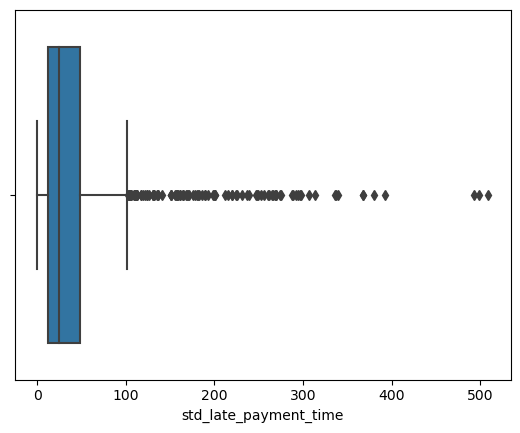

In [34]:
sns.boxplot(data_for_clustering3.std_late_payment_time)

In [35]:
# 2. rescaling
rfm_df = data_for_clustering3[['std_late_payment_time', 'Avg_late_payment_time']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(867, 2)

In [36]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)


In [37]:
rfm_df_scaled.columns = ['std_late_payment_time', 'Avg_late_payment_time']


In [38]:
rfm_df_scaled.describe()

,std_late_payment_time,Avg_late_payment_time
count,8.670000e+02,8.670000e+02
mean,-1.701830e-16,2.228129e-17
std,1.000577e+00,1.000577e+00
min,-6.921904e-01,-1.770878e+00
25%,-5.163505e-01,-4.642861e-01
50%,-3.448166e-01,-2.938109e-01
75%,4.253326e-03,4.527023e-02
max,6.726079e+00,7.359086e+00


## <span style="color: green;">K Means Clustering.</span>

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [40]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [41]:
kmeans.labels_

array([1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 3, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 3, 1, 1, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2,

In [42]:
temps1 = pd.Series(kmeans.labels_)

In [43]:
temps1.value_counts()

1    687
0    116
2     43
3     21
dtype: int64

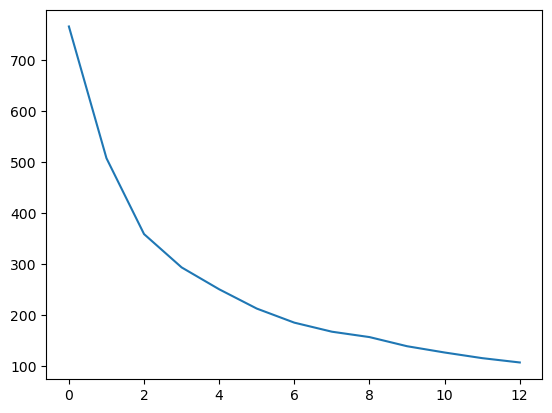

In [44]:
# elbow-curve/SSD
ssd = []
range_n_clusters = range(2,15)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [45]:
# silhouette analysis
range_n_clusters =  range(2,15)

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.7678537339903129
For n_clusters=3, the silhouette score is 0.7580335882855453
For n_clusters=4, the silhouette score is 0.6140010694268151
For n_clusters=5, the silhouette score is 0.48339938757681167
For n_clusters=6, the silhouette score is 0.47430574364709294
For n_clusters=7, the silhouette score is 0.42555887464840925
For n_clusters=8, the silhouette score is 0.3972281113015854
For n_clusters=9, the silhouette score is 0.40054908190687855
For n_clusters=10, the silhouette score is 0.3177419138432422
For n_clusters=11, the silhouette score is 0.3841042897452603
For n_clusters=12, the silhouette score is 0.3873125638147555
For n_clusters=13, the silhouette score is 0.37198422928779123
For n_clusters=14, the silhouette score is 0.36636282367166095


In [46]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [47]:
# assign the label
data_for_clustering3['cluster_id'] = kmeans.labels_
data_for_clustering3.head()

,CUSTOMER_NUMBER,Avg_late_payment_time,std_late_payment_time,cluster_id
0,37403,52.000000,61.098281,0
1,4003,5.837174,23.786510,0
3,1409,100.176536,247.281135,2
12,15768,63.250307,177.943884,2
14,20884,118.572519,99.985694,0


# we've added the segmentation as another columns : cluster ID

<AxesSubplot:xlabel='cluster_id', ylabel='Avg_late_payment_time'>

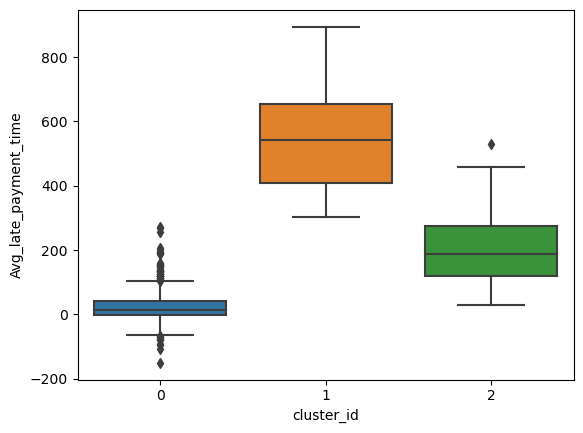

In [48]:
sns.boxplot(x='cluster_id', y='Avg_late_payment_time', data=data_for_clustering3)

<AxesSubplot:xlabel='cluster_id', ylabel='std_late_payment_time'>

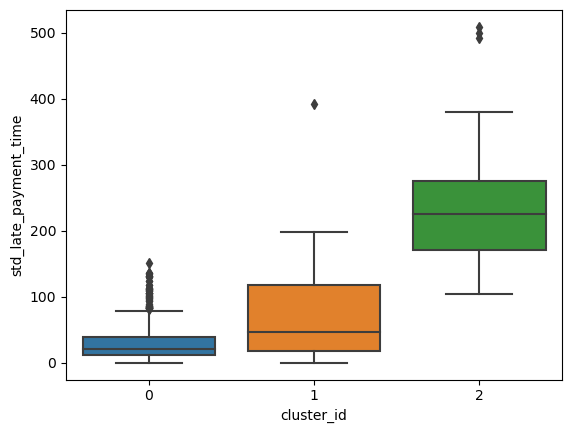

In [49]:
sns.boxplot(x='cluster_id', y='std_late_payment_time', data=data_for_clustering3)

In [50]:
data_for_clustering3['cluster_id'].value_counts()

0    772
2     69
1     26
Name: cluster_id, dtype: int64

cluster id of 2 strongly indicates that the customer is likely to make late payment

so we can prioratise these customers while collecting payment 

In [51]:
df_Past_Payments['CUSTOMER_NAME'][df_Past_Payments['CUSTOMER_NUMBER'].isin(data_for_clustering3['CUSTOMER_NUMBER'][data_for_clustering3['cluster_id'] == 3])].drop_duplicates()

Series([], Name: CUSTOMER_NAME, dtype: object)

Schuster has to take precautionary measures beforehand for above customers


In [52]:
# it can also keep an eye on the following customers
df_Past_Payments['CUSTOMER_NAME'][df_Past_Payments['CUSTOMER_NUMBER'].isin(data_for_clustering3['CUSTOMER_NUMBER'][data_for_clustering3['cluster_id'] == 1])].drop_duplicates()

4658     FIRS Corp
4846     BLUE Corp
8336     JASH Corp
8886     CLOU Corp
9309     DUBA Corp
11280    J MA Corp
12570    ANTH Corp
12576    LANV Corp
12796    RABL Corp
12941    HACK Corp
13052    ASH  Corp
13893    UAE  Corp
13901    ADMI Corp
15184    THE  Corp
21136    Al H Corp
33372    ALSU Corp
33417    I BE Corp
33825    AL Y Corp
36235    AL M Corp
36255    SAIF Corp
36339    QAWA Corp
37206    AL K Corp
77093    BEAU Corp
77566    LUXU Corp
81317    QURA Corp
82974    SAEE Corp
Name: CUSTOMER_NAME, dtype: object

----------------------------------------------------------------------

## <span style="color: red;">---- Exploring Open Invoice data.</span>

In [53]:
df_OpenInvoice = pd.read_csv('Open_Invoice_data.csv',encoding = 'ISO-8859-1')

In [54]:
df_OpenInvoice.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [55]:
df_OpenInvoice.isnull().sum()

AS_OF_DATE              0
Customer Type           0
Customer_Name           0
Customer Account No     3
Transaction Number      9
Transaction Date        0
Payment Term            0
Due Date                0
Transaction Currency    0
Local Amount            0
Transaction Class       0
AGE                     0
USD Amount              0
INV_CREATION_DATE       0
dtype: int64

In [56]:
df_OpenInvoice.AS_OF_DATE.value_counts()

04-APR-2022 01:07:01    88204
Name: AS_OF_DATE, dtype: int64

In [57]:
# what is difference between these two variables ?

df_OpenInvoice[['Transaction Date','INV_CREATION_DATE']]
# df_OpenInvoice['trans_INV_timedelta'] = df_OpenInvoice['Transaction Date'] - df_OpenInvoice['INV_CREATION_DATE']

,Transaction Date,INV_CREATION_DATE
0,21/12/2021,12/21/2021 12:53
1,01/02/2022,2/1/2022 14:09
2,24/03/2022,3/24/2022 17:46
3,04/01/2022,1/5/2022 11:49
4,03/03/2022,3/3/2022 22:30
...,...,...
88199,01/08/2021,8/1/2021 15:33
88200,01/08/2021,8/1/2021 15:33
88201,20/01/2022,1/20/2022 10:41
88202,18/01/2022,1/18/2022 9:51


In [58]:
df_OpenInvoice['INV_CREATION_DATE'] = pd.to_datetime(df_OpenInvoice['INV_CREATION_DATE'])
df_OpenInvoice['Due Date'] = pd.to_datetime(df_OpenInvoice['Due Date'])
df_OpenInvoice['Transaction Date'] = pd.to_datetime(df_OpenInvoice['Transaction Date'])



c:\Users\naikh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\naikh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\naikh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\naikh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/04/2022' in DD/MM/YYYY format. Provide format or specif

In [59]:
df_OpenInvoice['USD Amount'] = df_OpenInvoice['USD Amount'].apply(lambda x: int(x.replace(",", "")))


In [60]:
# removing customers who have already have payment due 
df_OpenInvoice = df_OpenInvoice[(df_OpenInvoice['USD Amount']>0) & (df_OpenInvoice['AGE']<0)]

In [61]:
df_OpenInvoice.isnull().sum()

AS_OF_DATE              0
Customer Type           0
Customer_Name           0
Customer Account No     0
Transaction Number      0
Transaction Date        0
Payment Term            0
Due Date                0
Transaction Currency    0
Local Amount            0
Transaction Class       0
AGE                     0
USD Amount              0
INV_CREATION_DATE       0
dtype: int64

In [62]:
df_OpenInvoice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28015 entries, 2 to 88189
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AS_OF_DATE            28015 non-null  object        
 1   Customer Type         28015 non-null  object        
 2   Customer_Name         28015 non-null  object        
 3   Customer Account No   28015 non-null  float64       
 4   Transaction Number    28015 non-null  object        
 5   Transaction Date      28015 non-null  datetime64[ns]
 6   Payment Term          28015 non-null  object        
 7   Due Date              28015 non-null  datetime64[ns]
 8   Transaction Currency  28015 non-null  object        
 9   Local Amount          28015 non-null  object        
 10  Transaction Class     28015 non-null  object        
 11  AGE                   28015 non-null  int64         
 12  USD Amount            28015 non-null  int64         
 13  INV_CREATION_DAT

In [63]:
df_OpenInvoice['Customer Account No'] = df_OpenInvoice['Customer Account No'].apply(lambda x: int(x))

In [64]:
df_OpenInvoice['payment_term_days'] = df_OpenInvoice['Due Date'] - df_OpenInvoice['INV_CREATION_DATE']
df_OpenInvoice['payment_term_days'] = df_OpenInvoice['payment_term_days'].apply(lambda x : x.days)

In [65]:
df_OpenInvoice['Transaction Class'].unique()

array(['INVOICE', 'DEBIT NOTE'], dtype=object)

In [66]:
data_for_prediction = df_OpenInvoice[['Customer Account No','payment_term_days','USD Amount']]

In [67]:
data_for_prediction

,Customer Account No,payment_term_days,USD Amount
2,23152,29,2000
4,7530,57,3800
5,7530,57,1264
6,7530,45,25858
7,7530,45,39873
...,...,...,...
88172,20867,59,3435
88186,23136,89,114039
88187,23136,59,32138
88188,23136,59,26764


 ## <span style="color: red;">Extracting same columns from Past Payments data.</span>

In [68]:
data_for_classification  = df_Past_Payments [['CUSTOMER_NUMBER','payment_term_days','USD Amount','TARGET_VARIABLE']]

In [69]:
data_for_classification 

,CUSTOMER_NUMBER,payment_term_days,USD Amount,TARGET_VARIABLE
0,37403,58,101018.63040,True
1,4003,30,48990.21133,True
2,4003,30,41991.60971,False
3,1409,30,41991.60971,True
4,4003,30,41991.60971,True
...,...,...,...,...
93928,21144,57,59914.50000,False
93929,21144,60,59914.50000,True
93931,21144,54,59914.50000,True
93935,21145,59,23574.33000,True


 ## <span style="color: red;">PART 5 :Training this data with Random forest model.</span>

In [70]:
data_for_classification.isnull().sum()

CUSTOMER_NUMBER      0
payment_term_days    0
USD Amount           0
TARGET_VARIABLE      0
dtype: int64

In [71]:
data_for_classification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82887 entries, 0 to 93936
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUSTOMER_NUMBER    82887 non-null  int64  
 1   payment_term_days  82887 non-null  int64  
 2   USD Amount         82887 non-null  float64
 3   TARGET_VARIABLE    82887 non-null  bool   
dtypes: bool(1), float64(1), int64(2)
memory usage: 2.6 MB


<AxesSubplot:xlabel='payment_term_days'>

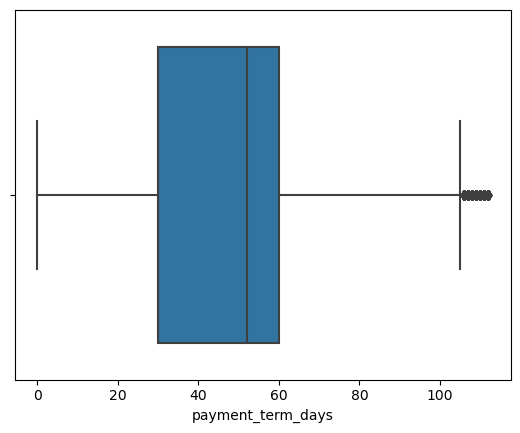

In [72]:
sns.boxplot ( data = data_for_classification , x= 'payment_term_days')

<AxesSubplot:xlabel='USD Amount'>

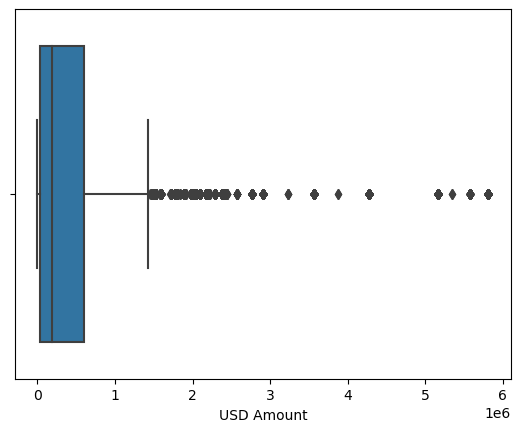

In [73]:
sns.boxplot ( data = data_for_classification , x= 'USD Amount')

 ## <span style="color: red;">Preprocessing train data. </span>

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X = data_for_classification.drop(['TARGET_VARIABLE','CUSTOMER_NUMBER'], axis=1)
y = data_for_classification['TARGET_VARIABLE']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

X_train[['USD Amount','payment_term_days']] = scaler.fit_transform(X_train[['USD Amount','payment_term_days']])

X_train.head()

,payment_term_days,USD Amount
76185,-0.820046,-0.478536
51258,-0.012719,0.108817
35597,-0.565100,-0.491689
44042,-0.182682,-0.589467
84678,-0.182682,0.450975


 ## <span style="color: red;">Building Random Forest model. </span>

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
from sklearn import metrics

In [81]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4,  random_state=100, oob_score=True)

In [82]:
%%time
rf.fit(X_train, y_train)

Wall time: 247 ms


c:\Users\naikh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=4, n_estimators=10, oob_score=True,
                       random_state=100)

In [83]:
rf.oob_score_


0.6933471216821786

In [84]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [85]:
from sklearn.metrics import plot_roc_curve

c:\Users\naikh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


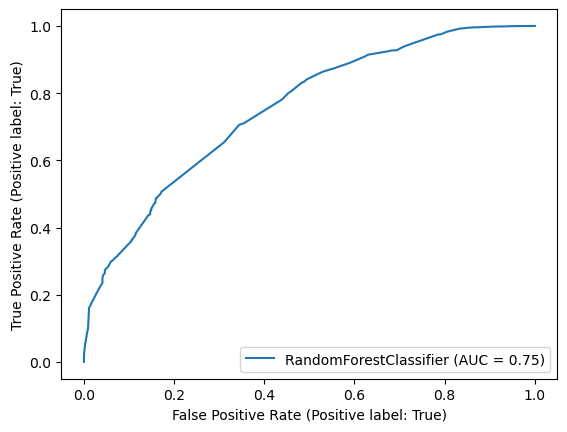

In [86]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [89]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [90]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [91]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 1min 35s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [92]:
grid_search.best_score_

0.8234574284729403

In [93]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

c:\Users\naikh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


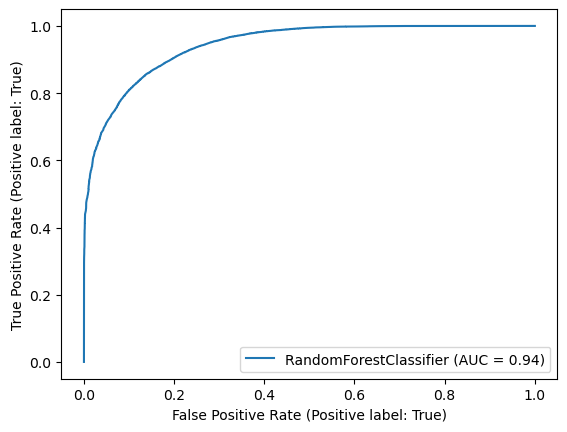

In [94]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [95]:
rf_best.feature_importances_

array([0.34558892, 0.65441108])

In [96]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [97]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,USD Amount,0.654411
0,payment_term_days,0.345589


In [98]:


X_test

,payment_term_days,USD Amount
28648,30,580000.000000
84312,60,919887.342500
29564,90,20647.310000
53594,74,512404.920300
82953,106,447.110663
...,...,...
41352,60,796618.482100
33144,16,359925.360000
29443,90,99440.150000
31434,60,48939.080000


In [99]:
X_test[['USD Amount','payment_term_days']] = scaler.transform(X_test[['USD Amount','payment_term_days']])

In [100]:
y_test_pred = rf_best.predict(X_test)

In [101]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [102]:
# Let's see the head
y_pred_1.head()

,0
0,True
1,True
2,True
3,False
4,True


In [103]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [104]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [105]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [106]:
y_pred_final.head()

,TARGET_VARIABLE,0
0,True,True
1,True,True
2,True,True
3,False,False
4,True,True


In [107]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'default_Predicted'})

In [108]:
# Let's see the head of y_pred_final
y_pred_final.head()

,TARGET_VARIABLE,default_Predicted
0,True,True
1,True,True
2,True,True
3,False,False
4,True,True


In [109]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.TARGET_VARIABLE, y_pred_final.default_Predicted)

0.8372541923030522

In [110]:
confusion2 = metrics.confusion_matrix(y_pred_final.TARGET_VARIABLE, y_pred_final.default_Predicted )
confusion2

array([[ 6534,  2721],
       [ 1326, 14286]], dtype=int64)

------------------

 ## <span style="color: red;">Predictions on open invoice dataset Using Random Forest model. </span>

In [111]:
data_for_prediction.head()

,Customer Account No,payment_term_days,USD Amount
2,23152,29,2000
4,7530,57,3800
5,7530,57,1264
6,7530,45,25858
7,7530,45,39873


In [112]:
data_for_prediction[['USD Amount','payment_term_days']] = scaler.transform(data_for_prediction[['USD Amount','payment_term_days']])

C:\Users\naikh\AppData\Local\Temp\ipykernel_16124\1867964633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_prediction[['USD Amount','payment_term_days']] = scaler.transform(data_for_prediction[['USD Amount','payment_term_days']])


In [113]:
data_for_prediction['prediction'] = rf_best.predict(data_for_prediction[['USD Amount','payment_term_days']])

c:\Users\naikh\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\Users\naikh\AppData\Local\Temp\ipykernel_16124\2003135049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_prediction['prediction'] = rf_best.predict(data_for_prediction[['USD Amount','payment_term_days']])


In [114]:
data_for_prediction.head()

,Customer Account No,payment_term_days,USD Amount,prediction
2,23152,-0.862536,-0.604954,False
4,7530,0.327208,-0.602729,False
5,7530,0.327208,-0.605863,False
6,7530,-0.182682,-0.575467,True
7,7530,-0.182682,-0.558145,True


# We Need to be follow up on following transactions as they have high chances of late payment 

In [115]:
# data_for_prediction['Customer Account No'][data_for_prediction.prediction ==True].unique()

In [116]:
df_OpenInvoice[['Customer Account No','Customer_Name','Transaction Number']][data_for_prediction.prediction ==True]

,Customer Account No,Customer_Name,Transaction Number
6,7530,ALLI Corp,100220000124
7,7530,ALLI Corp,100220000125
8,7530,ALLI Corp,100220000128
9,7530,ALLI Corp,100220000129
17,3685,ARAB Corp,100220000123
...,...,...,...
87121,1409,FITR Corp,160220001540
87122,1409,FITR Corp,160220001541
87123,1409,FITR Corp,160220001548
87124,1409,FITR Corp,160220001550


---------

 ## <span style="color: purple;">PART 6 : Let's build model using logistic regression. </span>
 Multiple iterations of Logistic regression model will be performed in order to arrive at suitable model

In [117]:
df1 = pd.read_csv('Received_Payments_Data.csv')

In [118]:
df3 = pd.read_excel('Data+Dictionary.xlsx',header = None)

In [119]:
df1 = df1.loc[df1['Local Amount']>0]

In [120]:
df1['RECEIPT_METHOD'].value_counts()

WIRE             83281
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: RECEIPT_METHOD, dtype: int64

In [121]:
df1.loc[df1['RECEIPT_METHOD'] == 'I/C Check', 'RECEIPT_METHOD'] = 'CHEQUE'
df1.loc[df1['RECEIPT_METHOD'] == 'I/C WIRE', 'RECEIPT_METHOD'] = 'WIRE'
df1.loc[df1['RECEIPT_METHOD'] == 'I/C CASH', 'RECEIPT_METHOD'] = 'CASH'

<AxesSubplot:>

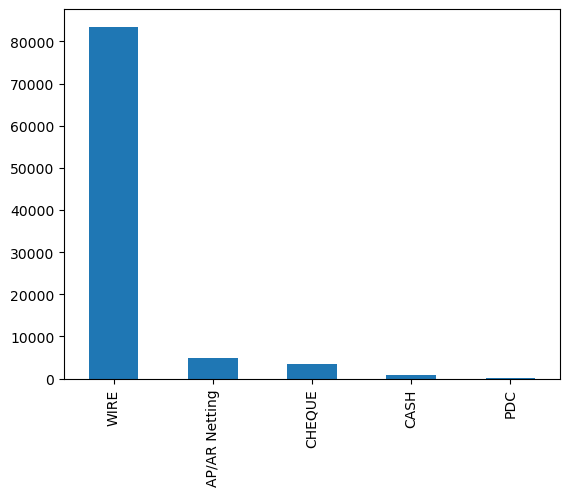

In [122]:
df1.RECEIPT_METHOD.value_counts().plot(kind='bar')

Most of the customers are choosing wire transfer method over other methods.

In [123]:
df1.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE'],
      dtype='object')

In [124]:
df1 = df1[['RECEIPT_METHOD', 'CUSTOMER_NAME',  'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED','INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE']]

In [125]:
df1['DUE_DATE'] = pd.to_datetime(df1['DUE_DATE'])
df1['RECEIPT_DATE'] = pd.to_datetime(df1['RECEIPT_DATE'])
df1['INVOICE_CREATION_DATE'] = pd.to_datetime(df1['INVOICE_CREATION_DATE'])


In [126]:
df1['late_days'] = df1['RECEIPT_DATE'] - df1['DUE_DATE']
df1['payment_term'] = df1['DUE_DATE'] - df1['INVOICE_CREATION_DATE']


In [127]:
df1['TARGET_VARIABLE'] = df1['late_days'] > pd.Timedelta(days=0)

In [128]:
df1=df1.drop(columns= ['RECEIPT_DATE','DUE_DATE','late_days','INVOICE_CREATION_DATE'])

In [129]:
df1[df1.payment_term < pd.Timedelta(days=0)]

,RECEIPT_METHOD,CUSTOMER_NAME,RECEIPT_DOC_NO,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,payment_term,TARGET_VARIABLE
148,WIRE,RADW Corp,1.000000e+11,PMT,USD,2345.81,2345.810000,1.0021E+11,INV,AED,Non Goods,-1 days,True
152,WIRE,RADW Corp,1.000000e+11,PMT,USD,2345.81,2345.810000,1.0021E+11,INV,AED,Non Goods,-1 days,True
160,WIRE,REAL Corp,1.000000e+11,PMT,AED,98247.31,98247.310000,PAY1001522100494,INV,AED,Non Goods,-30 days,True
161,WIRE,REAL Corp,1.000000e+11,PMT,AED,98247.31,98247.310000,PAY1001522100496,CM,AED,Non Goods,-30 days,True
167,WIRE,RADW Corp,1.000000e+11,PMT,AED,10861.54,10861.540000,1.0021E+11,INV,AED,Non Goods,-1 days,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93484,WIRE,THE Corp,2.840000e+11,PMT,AED,2389.27,2389.270000,2.842E+11,CM,AED,Goods,-5 days,True
93575,WIRE,SERB Corp,2.910000e+11,PMT,SAR,68512.00,18266.216920,10142,INV,SAR,Non Goods,-102 days,True
93576,WIRE,SERB Corp,2.910000e+11,PMT,SAR,68512.00,18266.216920,10141,INV,SAR,Non Goods,-102 days,True
93903,WIRE,SCOP Corp,2.970000e+11,PMT,AED,23875.00,6501.021103,2.9721E+11,INV,AED,Non Goods,-3 days,True


in 3000+ cases, the payment was done before the invoice was generated
for these cases, let's drop these entries

In [130]:
df1=df1[df1.payment_term >= pd.Timedelta(days=0)]

In [131]:
df1=df1.drop(columns= ['RECEIPT_DOC_NO','INVOICE_ALLOCATED','CUSTOMER_NAME','Local Amount','CURRENCY_CODE'])

In [132]:
# Converting Goods and Non goods categories into 0 and 1 respectively
df1['INVOICE_TYPE'] = df1['INVOICE_TYPE'].map({'Goods': 1, "Non Goods": 0})

In [133]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df1[['RECEIPT_METHOD','CLASS','INVOICE_CLASS','INVOICE_CURRENCY_CODE']], drop_first=True)

# Adding the results to the master dataframe
df2 = pd.concat([df1, dummy1], axis=1)

In [134]:
df2 = df2.drop(columns = ['RECEIPT_METHOD','CLASS','INVOICE_CLASS','INVOICE_CURRENCY_CODE'])

In [135]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89552 entries, 0 to 93936
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   USD Amount                 89552 non-null  float64        
 1   INVOICE_TYPE               89552 non-null  int64          
 2   payment_term               89552 non-null  timedelta64[ns]
 3   TARGET_VARIABLE            89552 non-null  bool           
 4   RECEIPT_METHOD_CASH        89552 non-null  uint8          
 5   RECEIPT_METHOD_CHEQUE      89552 non-null  uint8          
 6   RECEIPT_METHOD_PDC         89552 non-null  uint8          
 7   RECEIPT_METHOD_WIRE        89552 non-null  uint8          
 8   INVOICE_CLASS_DM           89552 non-null  uint8          
 9   INVOICE_CLASS_INV          89552 non-null  uint8          
 10  INVOICE_CURRENCY_CODE_BHD  89552 non-null  uint8          
 11  INVOICE_CURRENCY_CODE_EUR  89552 non-null  uint8      

In [136]:
df2['USD Amount'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    8.955200e+04
mean     5.470055e+05
std      9.586061e+05
min      1.287743e+00
25%      4.050662e+04
50%      2.000138e+05
75%      6.036712e+05
90%      1.257455e+06
95%      2.101629e+06
99%      5.814128e+06
max      1.084983e+07
Name: USD Amount, dtype: float64

In [137]:
df2['payment_term'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count                         89552
mean     47 days 13:09:18.299088797
std      26 days 06:53:18.987795171
min                 0 days 00:00:00
25%                30 days 00:00:00
50%                47 days 00:00:00
75%                60 days 00:00:00
90%                82 days 00:00:00
95%                90 days 00:00:00
99%               112 days 00:00:00
max               365 days 00:00:00
Name: payment_term, dtype: object

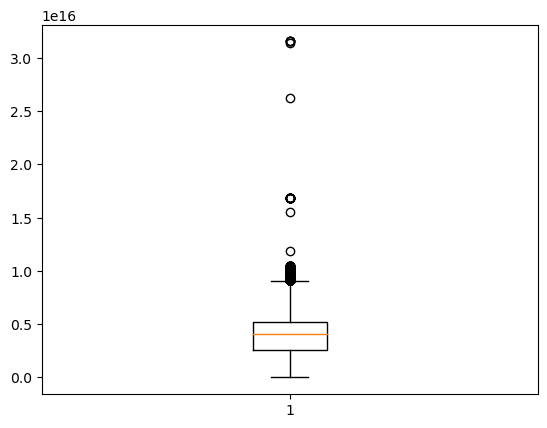

In [138]:
plt.boxplot(df2['payment_term'])
plt.show()

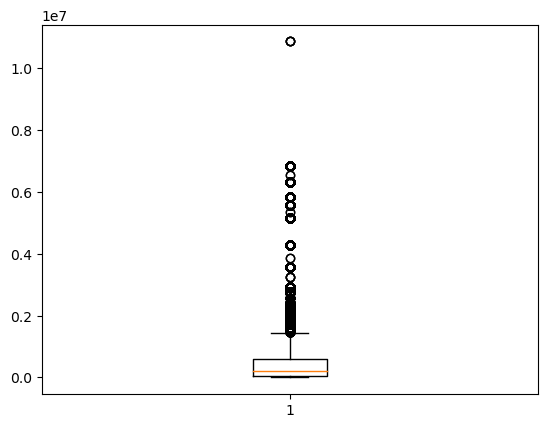

In [139]:
plt.boxplot(df2['USD Amount'])
plt.show()

In [140]:
df2.payment_term = df2.payment_term.apply(lambda x : x.days)

## Creating test and train datasets

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [142]:

# Putting feature variable to X
X = df2.drop(['TARGET_VARIABLE'], axis=1)

X.head()

,USD Amount,INVOICE_TYPE,payment_term,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
0,101018.63040,0,58,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,48990.21133,0,30,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
2,41991.60971,0,30,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
3,41991.60971,0,30,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,41991.60971,0,30,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [143]:
# Putting response variable to y
y = df2['TARGET_VARIABLE']

y.head()

0     True
1     True
2    False
3     True
4     True
Name: TARGET_VARIABLE, dtype: bool

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [145]:
# Standardizing the variables.
scaler = StandardScaler()

X_train[['USD Amount','payment_term']] = scaler.fit_transform(X_train[['USD Amount','payment_term']])

X_train.head()

,USD Amount,INVOICE_TYPE,payment_term,RECEIPT_METHOD_CASH,RECEIPT_METHOD_CHEQUE,RECEIPT_METHOD_PDC,RECEIPT_METHOD_WIRE,INVOICE_CLASS_DM,INVOICE_CLASS_INV,INVOICE_CURRENCY_CODE_BHD,INVOICE_CURRENCY_CODE_EUR,INVOICE_CURRENCY_CODE_GBP,INVOICE_CURRENCY_CODE_JOD,INVOICE_CURRENCY_CODE_KWD,INVOICE_CURRENCY_CODE_QAR,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CURRENCY_CODE_ZAR
45314,-0.563953,1,-0.671587,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
92954,0.146644,1,0.474167,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
75003,-0.538346,0,-0.442436,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
12562,-0.546697,0,0.474167,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
41635,-0.556113,1,0.435976,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [146]:
default = (sum(df2['TARGET_VARIABLE'])/len(df2['TARGET_VARIABLE'].index))*100
default

64.46310523494729

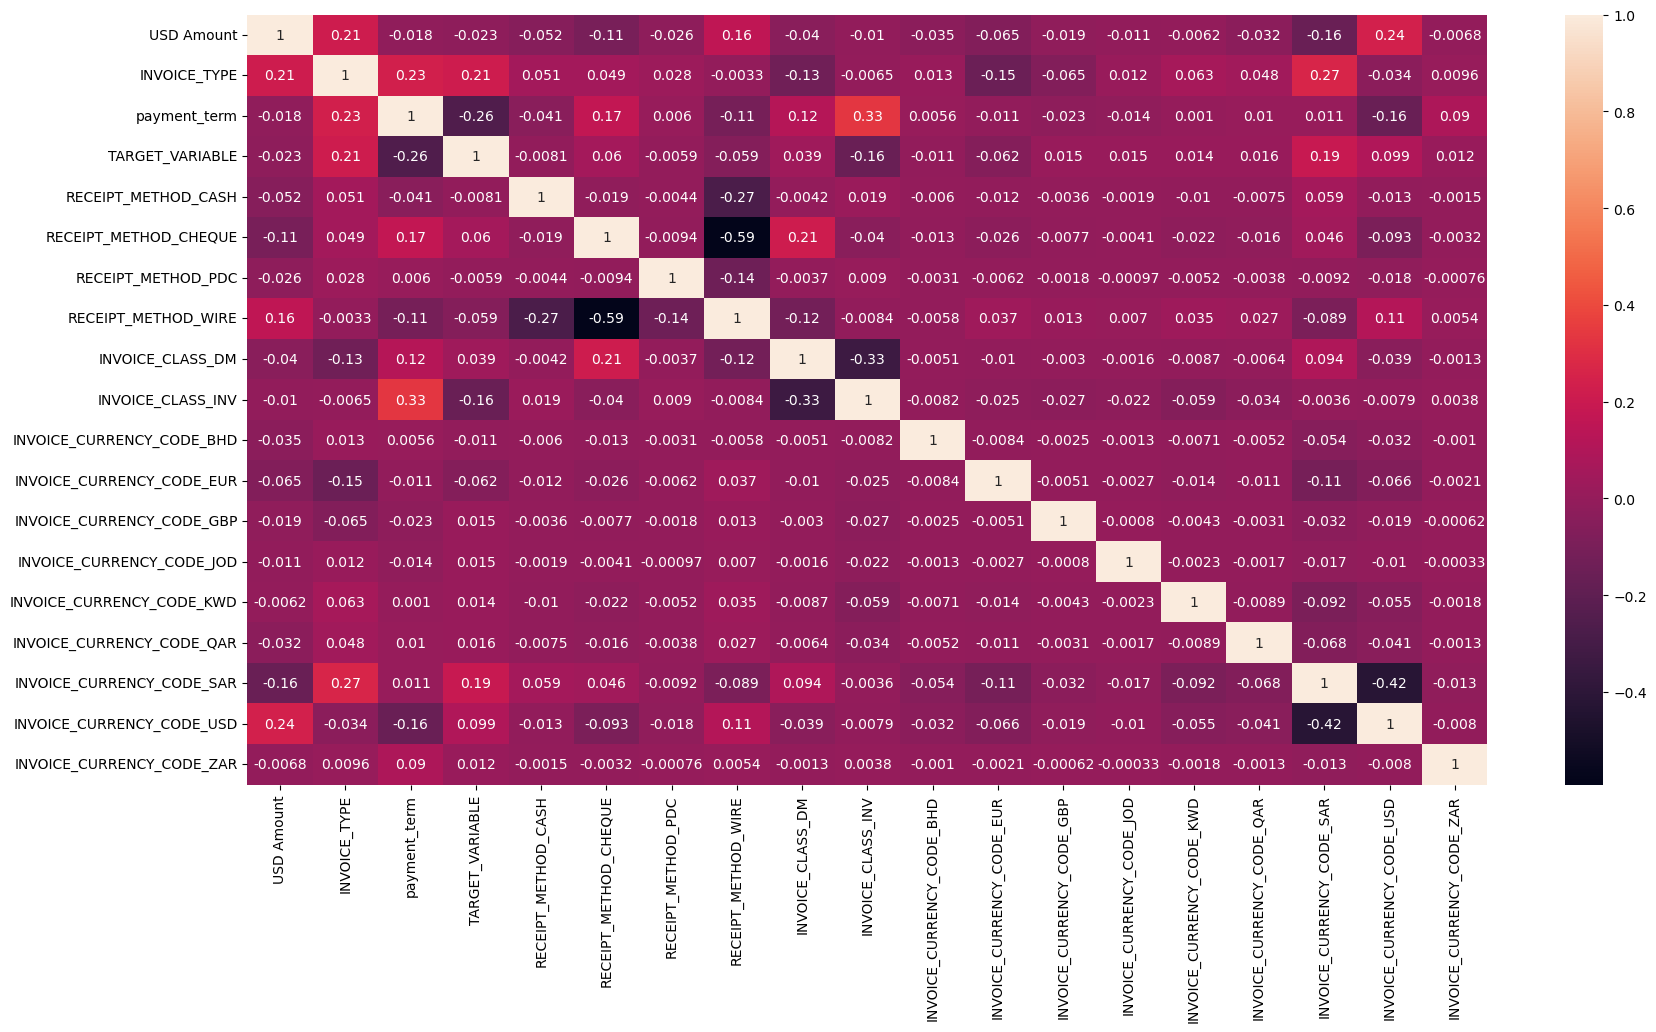

In [147]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df2.corr(),annot = True)
plt.show()

 No need to drop any variable as this heatmap looks ok 


In [148]:
import statsmodels.api as sm

In [149]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        TARGET_VARIABLE   No. Observations:                62686
Model:                            GLM   Df Residuals:                    62667
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33233.
Date:                Tue, 12 Sep 2023   Deviance:                       66467.
Time:                        22:50:11   Pearson chi2:                 6.45e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2134
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.3774      0.145      9.484      0.000       1.093       1.662
USD Amount                   -0.2349      0.011    -22.268      0.000      -0.256      -0.214
INVOICE_TYPE                  1.6939      0.027     63.549      0.000       1.642       1.746
payment_term                 -0.8992      0.013    -69.410      0.000      -0.925      -0.874
RECEIPT_METHOD_CASH          -1.9146      0.106    -18.004      0.000      -2.123      -1.706
RECEIPT_METHOD_CHEQUE         0.5759      0.069      8.326      0.000       0.440       0.711
RECEIPT_METHOD_PDC           -0.7849      0.205     -3.832      0.000      -1.186      -0.383
RECEIPT_METHOD_WIRE          -0.6648      0.044    -15.178      0.000      -0.751      -0.579
INVOICE_CLASS_DM              1.3616      0.223      6.105      0.000       0.924       1.799
INVOICE_CLASS_INV            -1.7885      0.138    -12.924      0.000      -2.060      -1.517
INVOICE_CURRENCY_CODE_BHD    -0.1436      0.132     -1.085      0.278      -0.403       0.116
INVOICE_CURRENCY_CODE_EUR    -0.0162      0.079     -0.207      0.836      -0.170       0.138
INVOICE_CURRENCY_CODE_GBP     2.2632      0.280      8.076      0.000       1.714       2.812
INVOICE_CURRENCY_CODE_JOD    22.2638    1.5e+04      0.001      0.999   -2.94e+04    2.94e+04
INVOICE_CURRENCY_CODE_KWD     0.3897      0.089      4.371      0.000       0.215       0.564
INVOICE_CURRENCY_CODE_QAR     0.5343      0.120      4.465      0.000       0.300       0.769
INVOICE_CURRENCY_CODE_SAR     0.6925      0.023     30.708      0.000       0.648       0.737
INVOICE_CURRENCY_CODE_USD     0.9963      0.028     35.683      0.000       0.942       1.051
INVOICE_CURRENCY_CODE_ZAR    27.9110   2.51e+04      0.001      0.999   -4.92e+04    4.93e+04
=============================================================================================
"""

the p value of invoice currency code zar is very high, Also it's correlation coefficient with USD was high so let's drop this and see how it affects the model

In [150]:
X_test = X_test.drop(['INVOICE_CURRENCY_CODE_ZAR','INVOICE_CURRENCY_CODE_JOD','INVOICE_CURRENCY_CODE_EUR','INVOICE_CURRENCY_CODE_BHD'], 1)
X_train = X_train.drop(['INVOICE_CURRENCY_CODE_ZAR','INVOICE_CURRENCY_CODE_JOD','INVOICE_CURRENCY_CODE_EUR','INVOICE_CURRENCY_CODE_BHD'], 1)

C:\Users\naikh\AppData\Local\Temp\ipykernel_16124\1083526620.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['INVOICE_CURRENCY_CODE_ZAR','INVOICE_CURRENCY_CODE_JOD','INVOICE_CURRENCY_CODE_EUR','INVOICE_CURRENCY_CODE_BHD'], 1)
C:\Users\naikh\AppData\Local\Temp\ipykernel_16124\1083526620.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['INVOICE_CURRENCY_CODE_ZAR','INVOICE_CURRENCY_CODE_JOD','INVOICE_CURRENCY_CODE_EUR','INVOICE_CURRENCY_CODE_BHD'], 1)


In [151]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        TARGET_VARIABLE   No. Observations:                62686
Model:                            GLM   Df Residuals:                    62671
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33284.
Date:                Tue, 12 Sep 2023   Deviance:                       66567.
Time:                        22:50:12   Pearson chi2:                 6.50e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2122
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.3884      0.145      9.583      0.000       1.104       1.672
USD Amount                   -0.2349      0.011    -22.355      0.000      -0.255      -0.214
INVOICE_TYPE                  1.6884      0.026     63.715      0.000       1.636       1.740
payment_term                 -0.8914      0.013    -69.045      0.000      -0.917      -0.866
RECEIPT_METHOD_CASH          -1.9055      0.106    -17.938      0.000      -2.114      -1.697
RECEIPT_METHOD_CHEQUE         0.5733      0.069      8.302      0.000       0.438       0.709
RECEIPT_METHOD_PDC           -0.7806      0.205     -3.816      0.000      -1.182      -0.380
RECEIPT_METHOD_WIRE          -0.6602      0.044    -15.104      0.000      -0.746      -0.574
INVOICE_CLASS_DM              1.3360      0.223      5.997      0.000       0.899       1.773
INVOICE_CLASS_INV            -1.8014      0.138    -13.037      0.000      -2.072      -1.531
INVOICE_CURRENCY_CODE_GBP     2.2584      0.280      8.064      0.000       1.709       2.807
INVOICE_CURRENCY_CODE_KWD     0.3883      0.089      4.360      0.000       0.214       0.563
INVOICE_CURRENCY_CODE_QAR     0.5335      0.120      4.461      0.000       0.299       0.768
INVOICE_CURRENCY_CODE_SAR     0.6930      0.022     31.048      0.000       0.649       0.737
INVOICE_CURRENCY_CODE_USD     0.9967      0.028     35.942      0.000       0.942       1.051
=============================================================================================
"""

In [152]:
# Getting the predicted values on the train set
y_train_pred = res2.predict((sm.add_constant(X_train)))
y_train_pred[:10]

45314    0.884857
92954    0.700792
75003    0.609297
12562    0.203040
41635    0.740808
43384    0.899263
87750    0.694048
3084     0.924021
61492    0.988860
82725    0.632323
dtype: float64

In [153]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.88485676, 0.7007924 , 0.60929693, 0.20304017, 0.74080825,
       0.89926274, 0.6940476 , 0.92402062, 0.98886037, 0.63232311])

In [154]:
y_train_pred_final = pd.DataFrame({'Actual_Default':y_train.values, 'default_Prob':y_train_pred})
# y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Actual_Default,default_Prob
0,True,0.884857
1,False,0.700792
2,False,0.609297
3,True,0.203040
4,True,0.740808


In [155]:
y_train_pred_final['predicted_default'] = y_train_pred_final.default_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Actual_Default,default_Prob,predicted_default
0,True,0.884857,1
1,False,0.700792,1
2,False,0.609297,1
3,True,0.203040,0
4,True,0.740808,1


In [156]:
from sklearn import metrics

In [157]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Actual_Default, y_train_pred_final.predicted_default )
print(confusion)

[[11729 10493]
 [ 6471 33993]]


In [158]:
print(metrics.accuracy_score(y_train_pred_final.Actual_Default, y_train_pred_final.predicted_default))

0.7293813610694573


In [159]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [160]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,RECEIPT_METHOD_WIRE,11.89
8,INVOICE_CLASS_INV,11.68
1,INVOICE_TYPE,4.85
12,INVOICE_CURRENCY_CODE_SAR,2.50
13,INVOICE_CURRENCY_CODE_USD,1.68
4,RECEIPT_METHOD_CHEQUE,1.56
2,payment_term,1.28
7,INVOICE_CLASS_DM,1.21
0,USD Amount,1.16
3,RECEIPT_METHOD_CASH,1.14


In [161]:
X_test = X_test.drop(['INVOICE_CLASS_INV'], 1)
X_train = X_train.drop(['INVOICE_CLASS_INV'], 1)

C:\Users\naikh\AppData\Local\Temp\ipykernel_16124\2638005697.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['INVOICE_CLASS_INV'], 1)
C:\Users\naikh\AppData\Local\Temp\ipykernel_16124\2638005697.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['INVOICE_CLASS_INV'], 1)


In [162]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        TARGET_VARIABLE   No. Observations:                62686
Model:                            GLM   Df Residuals:                    62672
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33426.
Date:                Tue, 12 Sep 2023   Deviance:                       66852.
Time:                        22:50:13   Pearson chi2:                 6.56e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2086
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.4049      0.045     -8.993      0.000      -0.493      -0.317
USD Amount                   -0.2338      0.011    -22.239      0.000      -0.254      -0.213
INVOICE_TYPE                  1.7442      0.026     66.648      0.000       1.693       1.796
payment_term                 -0.9545      0.012    -77.211      0.000      -0.979      -0.930
RECEIPT_METHOD_CASH          -1.9604      0.107    -18.382      0.000      -2.169      -1.751
RECEIPT_METHOD_CHEQUE         0.6046      0.069      8.708      0.000       0.469       0.741
RECEIPT_METHOD_PDC           -0.8088      0.206     -3.929      0.000      -1.212      -0.405
RECEIPT_METHOD_WIRE          -0.6645      0.044    -15.128      0.000      -0.751      -0.578
INVOICE_CLASS_DM              3.2423      0.172     18.854      0.000       2.905       3.579
INVOICE_CURRENCY_CODE_GBP     2.3285      0.277      8.391      0.000       1.785       2.872
INVOICE_CURRENCY_CODE_KWD     0.4064      0.088      4.616      0.000       0.234       0.579
INVOICE_CURRENCY_CODE_QAR     0.5371      0.119      4.529      0.000       0.305       0.769
INVOICE_CURRENCY_CODE_SAR     0.6700      0.022     30.157      0.000       0.626       0.714
INVOICE_CURRENCY_CODE_USD     0.9789      0.028     35.266      0.000       0.924       1.033
=============================================================================================
"""

In [163]:
X_test = X_test.drop(['RECEIPT_METHOD_WIRE'], 1)
X_train = X_train.drop(['RECEIPT_METHOD_WIRE'], 1)

C:\Users\naikh\AppData\Local\Temp\ipykernel_16124\4197805432.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['RECEIPT_METHOD_WIRE'], 1)
C:\Users\naikh\AppData\Local\Temp\ipykernel_16124\4197805432.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['RECEIPT_METHOD_WIRE'], 1)


In [164]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        TARGET_VARIABLE   No. Observations:                62686
Model:                            GLM   Df Residuals:                    62673
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33546.
Date:                Tue, 12 Sep 2023   Deviance:                       67092.
Time:                        22:50:13   Pearson chi2:                 6.56e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2055
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.0152      0.020    -50.585      0.000      -1.055      -0.976
USD Amount                   -0.2441      0.010    -23.343      0.000      -0.265      -0.224
INVOICE_TYPE                  1.7118      0.026     65.894      0.000       1.661       1.763
payment_term                 -0.9416      0.012    -76.790      0.000      -0.966      -0.918
RECEIPT_METHOD_CASH          -1.3317      0.098    -13.608      0.000      -1.524      -1.140
RECEIPT_METHOD_CHEQUE         1.2175      0.056     21.639      0.000       1.107       1.328
RECEIPT_METHOD_PDC           -0.1798      0.201     -0.893      0.372      -0.574       0.215
INVOICE_CLASS_DM              3.1664      0.172     18.441      0.000       2.830       3.503
INVOICE_CURRENCY_CODE_GBP     2.2670      0.277      8.180      0.000       1.724       2.810
INVOICE_CURRENCY_CODE_KWD     0.3799      0.088      4.319      0.000       0.207       0.552
INVOICE_CURRENCY_CODE_QAR     0.5063      0.119      4.272      0.000       0.274       0.739
INVOICE_CURRENCY_CODE_SAR     0.6848      0.022     30.873      0.000       0.641       0.728
INVOICE_CURRENCY_CODE_USD     0.9681      0.028     34.998      0.000       0.914       1.022
=============================================================================================
"""

In [165]:
# The Model have become unneccessarily complex, lets remove the categorical variables and see if we can have decent model

In [166]:
# X_test = X_test.drop(['RECEIPT_METHOD_PDC'], 1)
# X_train = X_train.drop(['RECEIPT_METHOD_PDC'], 1)
X_test = X_test[['USD Amount', 'payment_term']]
X_train = X_train[['USD Amount', 'payment_term']]

In [167]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        TARGET_VARIABLE   No. Observations:                62686
Model:                            GLM   Df Residuals:                    62683
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38472.
Date:                Tue, 12 Sep 2023   Deviance:                       76944.
Time:                        22:50:14   Pearson chi2:                 6.19e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07032
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6462      0.009     73.656      0.000       0.629       0.663
USD Amount      -0.0695      0.009     -8.001      0.000      -0.087      -0.053
payment_term    -0.5910      0.009    -63.785      0.000      -0.609      -0.573
================================================================================
"""

In [168]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,USD Amount,1.0
1,payment_term,1.0


In [169]:
y_train_pred = res5.predict((sm.add_constant(X_train)))
y_train_pred[:10]

45314    0.746930
92954    0.588000
75003    0.720126
12562    0.599628
41635    0.605191
43384    0.766586
87750    0.585705
3084     0.801091
61492    0.826108
82725    0.326151
dtype: float64

In [170]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.74693029, 0.58799957, 0.72012622, 0.59962789, 0.60519117,
       0.76658576, 0.58570517, 0.80109103, 0.82610813, 0.32615133])

In [171]:
y_train_pred_final = pd.DataFrame({'Actual_Default':y_train.values, 'default_Prob':y_train_pred})
# y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Actual_Default,default_Prob
0,True,0.746930
1,False,0.588000
2,False,0.720126
3,True,0.599628
4,True,0.605191


In [172]:
y_train_pred_final['predicted_default'] = y_train_pred_final.default_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Actual_Default,default_Prob,predicted_default
0,True,0.746930,1
1,False,0.588000,1
2,False,0.720126,1
3,True,0.599628,1
4,True,0.605191,1


In [173]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Actual_Default, y_train_pred_final.predicted_default )
print(confusion)

[[ 4915 17307]
 [ 3818 36646]]


In [174]:
print(metrics.accuracy_score(y_train_pred_final.Actual_Default, y_train_pred_final.predicted_default))

0.6630029033596018


In [175]:
# Function for drawing ROC Curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [176]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Actual_Default, y_train_pred_final.default_Prob, drop_intermediate = False )

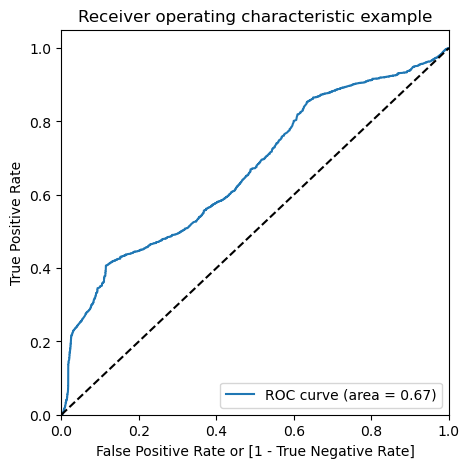

In [177]:
draw_roc(y_train_pred_final.Actual_Default, y_train_pred_final.default_Prob)

In [178]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.default_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_Default,default_Prob,predicted_default,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,True,0.746930,1,1,1,1,1,1,1,1,1,0,0
1,False,0.588000,1,1,1,1,1,1,1,0,0,0,0
2,False,0.720126,1,1,1,1,1,1,1,1,1,0,0
3,True,0.599628,1,1,1,1,1,1,1,0,0,0,0
4,True,0.605191,1,1,1,1,1,1,1,1,0,0,0


In [179]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_Default, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.645503  1.000000  0.000000
0.1   0.1  0.645375  0.999728  0.000135
0.2   0.2  0.645375  0.999728  0.000135
0.3   0.3  0.645774  0.995255  0.009405
0.4   0.4  0.639313  0.968120  0.040590
0.5   0.5  0.663003  0.905645  0.221177
0.6   0.6  0.591982  0.614398  0.551166
0.7   0.7  0.569872  0.483714  0.726757
0.8   0.8  0.446352  0.153321  0.979930
0.9   0.9  0.354497  0.000000  1.000000


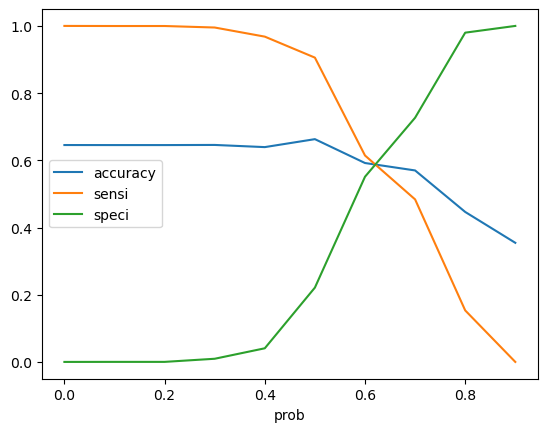

In [180]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

We Need highly sensitive model so from the Curve Above optimum values for cutoff looks like 0.5

In [181]:
y_train_pred_final['final_predicted'] = y_train_pred_final.default_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Actual_Default,default_Prob,predicted_default,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,True,0.746930,1,1,1,1,1,1,1,1,1,0,0,1
1,False,0.588000,1,1,1,1,1,1,1,0,0,0,0,1
2,False,0.720126,1,1,1,1,1,1,1,1,1,0,0,1
3,True,0.599628,1,1,1,1,1,1,1,0,0,0,0,1
4,True,0.605191,1,1,1,1,1,1,1,1,0,0,0,1


In [182]:
metrics.accuracy_score(y_train_pred_final.Actual_Default, y_train_pred_final.final_predicted)

0.6630029033596018

In [183]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Actual_Default, y_train_pred_final.final_predicted )
confusion2

array([[ 4915, 17307],
       [ 3818, 36646]], dtype=int64)

In [184]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [185]:
# Let's have a look at sensitivity of our model 
TP / float(TP+FN)

0.9056445235270858

so with 90 % sensitive model, we will have 9318 defaults, and around 10000 non defaulters 

----------

### Making predictions on the test set

In [186]:
X_test[['USD Amount','payment_term']] = scaler.transform(X_test[['USD Amount','payment_term']])

In [187]:
# X_test = X_test[col]
X_test.head()

,USD Amount,payment_term
60181,5.271759,-0.671587
37676,-0.537644,-0.671587
59038,0.528853,-1.817341
5869,-0.567221,-1.817341
41106,-0.419445,-0.900738


In [188]:
X_test_sm = sm.add_constant(X_test)

In [189]:
y_test_pred = res5.predict(X_test_sm)

In [190]:
y_test_pred = res5.predict(X_test_sm)

In [191]:
y_test_pred[:10]

60181    0.662959
37676    0.746584
59038    0.843368
5869     0.853175
41106    0.769891
59181    0.830098
25948    0.410786
79788    0.437932
19368    0.583906
79298    0.533005
dtype: float64

In [192]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [193]:
# Let's see the head
y_pred_1.head()

,0
60181,0.662959
37676,0.746584
59038,0.843368
5869,0.853175
41106,0.769891


In [194]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [195]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [196]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [197]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [198]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'default_Prob'})

In [199]:
# Let's see the head of y_pred_final
y_pred_final.head()

,TARGET_VARIABLE,CustID,default_Prob
0,False,60181,0.662959
1,True,37676,0.746584
2,True,59038,0.843368
3,True,5869,0.853175
4,True,41106,0.769891


In [200]:
y_pred_final['final_predicted'] = y_pred_final.default_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [201]:
y_pred_final.head()

,TARGET_VARIABLE,CustID,default_Prob,final_predicted
0,False,60181,0.662959,1
1,True,37676,0.746584,1
2,True,59038,0.843368,1
3,True,5869,0.853175,1
4,True,41106,0.769891,1


In [202]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.TARGET_VARIABLE, y_pred_final.final_predicted)

0.6598674905084494

In [203]:
confusion2 = metrics.confusion_matrix(y_pred_final.TARGET_VARIABLE, y_pred_final.final_predicted )
confusion2

array([[ 2101,  7501],
       [ 1637, 15627]], dtype=int64)

In [204]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [205]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.905178405931418

### This is the final Logistic regression model

In [206]:
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        TARGET_VARIABLE   No. Observations:                62686
Model:                            GLM   Df Residuals:                    62683
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38472.
Date:                Tue, 12 Sep 2023   Deviance:                       76944.
Time:                        22:50:15   Pearson chi2:                 6.19e+04
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07032
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6462      0.009     73.656      0.000       0.629       0.663
USD Amount      -0.0695      0.009     -8.001      0.000      -0.087      -0.053
payment_term    -0.5910      0.009    -63.785      0.000      -0.609      -0.573
================================================================================
"""

--------------- 

## Preparing Open Invoice dataset for prediction 

In [207]:
df_OpenInvoice2 = pd.read_csv('Open_Invoice_data.csv',encoding = 'ISO-8859-1')

In [208]:
df_OpenInvoice2

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88199,04-APR-2022 01:07:01,Related Party,FITR Corp,1279.0,165210000125,01/08/2021,Immediate,01/08/2021,USD,"-1,199",CREDIT NOTE,247,"-1,199",8/1/2021 15:33
88200,04-APR-2022 01:07:01,Related Party,FITR Corp,1279.0,165210000126,01/08/2021,Immediate,01/08/2021,USD,-914,CREDIT NOTE,247,-914,8/1/2021 15:33
88201,04-APR-2022 01:07:01,Related Party,MCT Corp,1825.0,165220000011,20/01/2022,30 Days from EOM,28/02/2022,AED,"12,866",INVOICE,36,"12,866",1/20/2022 10:41
88202,04-APR-2022 01:07:01,Related Party,QATA Corp,2273.0,165220000007,18/01/2022,60 Days from Inv Date,19/03/2022,USD,"18,118",INVOICE,17,"18,118",1/18/2022 9:51


In [209]:
df_OpenInvoice2['INV_CREATION_DATE'] = pd.to_datetime(df_OpenInvoice2['INV_CREATION_DATE'])
df_OpenInvoice2['Due Date'] = pd.to_datetime(df_OpenInvoice2['Due Date'])
df_OpenInvoice2['Transaction Date'] = pd.to_datetime(df_OpenInvoice2['Transaction Date'])



c:\Users\naikh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\naikh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\naikh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\naikh\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/04/2022' in DD/MM/YYYY format. Provide format or specif

In [210]:
df_OpenInvoice2['USD Amount'] = df_OpenInvoice2['USD Amount'].apply(lambda x: int(x.replace(",", "")))


In [211]:
# removing customers who have already have payment due 
df_OpenInvoice2 = df_OpenInvoice2[(df_OpenInvoice2['USD Amount']>0) & (df_OpenInvoice2['AGE']<0)]

In [212]:
df_OpenInvoice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28015 entries, 2 to 88189
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AS_OF_DATE            28015 non-null  object        
 1   Customer Type         28015 non-null  object        
 2   Customer_Name         28015 non-null  object        
 3   Customer Account No   28015 non-null  int64         
 4   Transaction Number    28015 non-null  object        
 5   Transaction Date      28015 non-null  datetime64[ns]
 6   Payment Term          28015 non-null  object        
 7   Due Date              28015 non-null  datetime64[ns]
 8   Transaction Currency  28015 non-null  object        
 9   Local Amount          28015 non-null  object        
 10  Transaction Class     28015 non-null  object        
 11  AGE                   28015 non-null  int64         
 12  USD Amount            28015 non-null  int64         
 13  INV_CREATION_DAT

In [213]:
df_OpenInvoice2['Customer Account No'] = df_OpenInvoice2['Customer Account No'].apply(lambda x: int(x))

C:\Users\naikh\AppData\Local\Temp\ipykernel_16124\2295147155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OpenInvoice2['Customer Account No'] = df_OpenInvoice2['Customer Account No'].apply(lambda x: int(x))


In [214]:
df_OpenInvoice2['payment_term_days'] = df_OpenInvoice2['Due Date'] - df_OpenInvoice2['INV_CREATION_DATE']
df_OpenInvoice2['payment_term_days'] = df_OpenInvoice2['payment_term_days'].apply(lambda x : x.days)

C:\Users\naikh\AppData\Local\Temp\ipykernel_16124\2457831146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OpenInvoice2['payment_term_days'] = df_OpenInvoice2['Due Date'] - df_OpenInvoice2['INV_CREATION_DATE']
C:\Users\naikh\AppData\Local\Temp\ipykernel_16124\2457831146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OpenInvoice2['payment_term_days'] = df_OpenInvoice2['payment_term_days'].apply(lambda x : x.days)


Following columns are present in our past payments data 
- USD Amount
- payment_term

In [215]:
df_OpenInvoice2

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,payment_term_days
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152,100220000143,2022-03-24,30 Days from Inv Date,2022-04-23,USD,"2,000",INVOICE,-18,2000,2022-03-24 17:46:00,29
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530,100220000105,2022-03-03,30 Days from EOM,2022-04-30,AED,"3,800",INVOICE,-25,3800,2022-03-03 22:30:00,57
5,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530,100220000106,2022-03-03,30 Days from EOM,2022-04-30,AED,"1,264",INVOICE,-25,1264,2022-03-03 22:30:00,57
6,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530,100220000124,2022-03-15,30 Days from EOM,2022-04-30,AED,"25,858",INVOICE,-25,25858,2022-03-15 19:06:00,45
7,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530,100220000125,2022-03-15,30 Days from EOM,2022-04-30,AED,"39,873",INVOICE,-25,39873,2022-03-15 19:06:00,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88172,04-APR-2022 01:07:01,3rd Party,MIDD Corp,20867,165220000039,2022-03-30,60 Days from Inv Date,2022-05-29,USD,"3,435",INVOICE,-54,3435,2022-03-30 11:10:00,59
88186,04-APR-2022 01:07:01,3rd Party,SAUD Corp,23136,165220000032,2022-07-03,60 Days from Inv Date,2022-06-05,USD,"114,039",INVOICE,-31,114039,2022-03-07 09:58:00,89
88187,04-APR-2022 01:07:01,3rd Party,SAUD Corp,23136,165220000034,2022-03-17,60 Days from Inv Date,2022-05-16,USD,"32,138",INVOICE,-41,32138,2022-03-17 08:21:00,59
88188,04-APR-2022 01:07:01,3rd Party,SAUD Corp,23136,165220000035,2022-03-18,60 Days from Inv Date,2022-05-17,USD,"26,764",INVOICE,-42,26764,2022-03-18 10:48:00,59


In [216]:
data_for_prediction = df_OpenInvoice2[['Customer Account No','USD Amount','payment_term_days']]

In [217]:
data_for_prediction2 = data_for_prediction.drop(['Customer Account No'],1)

C:\Users\naikh\AppData\Local\Temp\ipykernel_16124\1364847318.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_for_prediction2 = data_for_prediction.drop(['Customer Account No'],1)


In [218]:
data_for_prediction2

,USD Amount,payment_term_days
2,2000,29
4,3800,57
5,1264,57
6,25858,45
7,39873,45
...,...,...
88172,3435,59
88186,114039,89
88187,32138,59
88188,26764,59


In [219]:
data_for_prediction

,Customer Account No,USD Amount,payment_term_days
2,23152,2000,29
4,7530,3800,57
5,7530,1264,57
6,7530,25858,45
7,7530,39873,45
...,...,...,...
88172,20867,3435,59
88186,23136,114039,89
88187,23136,32138,59
88188,23136,26764,59


In [220]:
data_for_prediction2[['USD Amount','payment_term_days']] = scaler.transform(data_for_prediction2[['USD Amount','payment_term_days']])

c:\Users\naikh\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- payment_term_days
Feature names seen at fit time, yet now missing:
- payment_term

  warnings.warn(message, FutureWarning)


-----------------------

## Our logistic regression model will now perform predictions on Open Invoice data

In [221]:
data_for_prediction2_sm = sm.add_constant(data_for_prediction2)

In [222]:
y_test_pred_open = res5.predict(data_for_prediction2_sm)

In [223]:
# Converting y_pred to a dataframe which is an array
y_test_pred_open_1 = pd.DataFrame(y_test_pred_open)

In [224]:
y_test_pred_open_1

,0
2,0.751244
4,0.616112
5,0.616156
6,0.677510
7,0.677287
...,...
88172,0.605386
88186,0.436032
88187,0.604887
88188,0.604981


In [225]:
# Renaming the column 
y_test_pred_open_1= y_test_pred_open_1.rename(columns={ 0 : 'default_Prob'})

In [226]:
y_test_pred_open_1['final_predicted'] = y_test_pred_open_1.default_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [227]:
y_test_pred_open_1

,default_Prob,final_predicted
2,0.751244,1
4,0.616112,1
5,0.616156,1
6,0.677510,1
7,0.677287,1
...,...,...
88172,0.605386,1
88186,0.436032,0
88187,0.604887,1
88188,0.604981,1


In [228]:
y_test_pred_open_1.final_predicted.sum()

18771

In [229]:
y_test_pred_open_1

,default_Prob,final_predicted
2,0.751244,1
4,0.616112,1
5,0.616156,1
6,0.677510,1
7,0.677287,1
...,...,...
88172,0.605386,1
88186,0.436032,0
88187,0.604887,1
88188,0.604981,1


In [230]:
y_pred_final = pd.concat([data_for_prediction, y_test_pred_open_1],axis=1)

Following is result of our model on open Invoice dataset 

In [231]:
y_pred_final[y_pred_final.final_predicted == 1]

,Customer Account No,USD Amount,payment_term_days,default_Prob,final_predicted
2,23152,2000,29,0.751244,1
4,7530,3800,57,0.616112,1
5,7530,1264,57,0.616156,1
6,7530,25858,45,0.677510,1
7,7530,39873,45,0.677287,1
...,...,...,...,...,...
88171,20867,35624,59,0.604827,1
88172,20867,3435,59,0.605386,1
88187,23136,32138,59,0.604887,1
88188,23136,26764,59,0.604981,1


Considering overall scenario, It'll be better to choose random forest model . 


-----------

# **Thank You !!**